In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-complaint/data_merged.xlsx
/kaggle/input/customer-comlaint-dataset/data_merged_final.xlsx
/kaggle/input/vietnamese-stopwords/stopwords.txt


In [2]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [3]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.naive_bayes import ComplementNB
import seaborn as sb
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import joblib
import nltk
from sklearn.multioutput import MultiOutputClassifier

from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPool1D, Dense, Flatten, Dropout, GRU, Bidirectional

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
import pandas as pd
import re
import seaborn as sns
import emoji
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from keras.models import load_model
from joblib import dump
import torch
import pandas as pd
import numpy as np

# Thu vien transformer cho Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

# Xu ly label
from sklearn.preprocessing import LabelEncoder

# Metric danh gia 
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

# Ve do thi
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

2024-06-01 12:46:42.255567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 12:46:42.255838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 12:46:42.451464: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import numpy as np
import pandas as pd
import os
import string
import nltk
import unicodedata
import regex as re
import tensorflow as tf


import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import gaussian_kde

# Load dataset

In [5]:
df_complaint = pd.read_excel('/kaggle/input/customer-comlaint-dataset/data_merged_final.xlsx')

df_complaint.head(10)

,Unnamed: 0,content,Quality,Service,Shipping,Packing,ID
0,0.0,"dùng chán lắm, mau hết pin",0,NaN,NaN,NaN,NaN
1,1.0,Mình đặt hàng màu trắng shop giao màu đen,NaN,0.0,NaN,NaN,NaN
2,2.0,"bìa sách hơi mỏng, vỏ hộp giao bị bóp méo",0,NaN,NaN,0.0,NaN
3,3.0,Không hiểu kiểu gì nà lại giao cho mình 1 cuốn...,NaN,0.0,NaN,0.0,NaN
4,4.0,"Giao sai màu, không biết tại sao nfc không ...",0,0.0,NaN,NaN,NaN
5,5.0,"Không hiệu quả, chuột vẫn vào",0,NaN,NaN,NaN,NaN
6,6.0,Mình cũng đã không hài lòng việc bảo quản sản ...,0,0.0,NaN,0.0,NaN
7,7.0,"- Hộp rất cũ, không có bọc nilon, bị rách ở hầ...",0,NaN,NaN,0.0,NaN
8,8.0,Cắm điện đèn sáng nhưng không có sạc usb như t...,0,NaN,NaN,NaN,NaN
9,9.0,Tệ: giao nhầm hàng. Yc giao lại sớm nhất.,NaN,0.0,NaN,NaN,NaN


In [6]:
df_complaint.fillna(-1, inplace=True)

In [7]:
df_complaint = df_complaint[['content','Quality','Service','Shipping','Packing']]

df_complaint.head(10)

,content,Quality,Service,Shipping,Packing
0,"dùng chán lắm, mau hết pin",0,-1.0,-1,-1.0
1,Mình đặt hàng màu trắng shop giao màu đen,-1,0.0,-1,-1.0
2,"bìa sách hơi mỏng, vỏ hộp giao bị bóp méo",0,-1.0,-1,0.0
3,Không hiểu kiểu gì nà lại giao cho mình 1 cuốn...,-1,0.0,-1,0.0
4,"Giao sai màu, không biết tại sao nfc không ...",0,0.0,-1,-1.0
5,"Không hiệu quả, chuột vẫn vào",0,-1.0,-1,-1.0
6,Mình cũng đã không hài lòng việc bảo quản sản ...,0,0.0,-1,0.0
7,"- Hộp rất cũ, không có bọc nilon, bị rách ở hầ...",0,-1.0,-1,0.0
8,Cắm điện đèn sáng nhưng không có sạc usb như t...,0,-1.0,-1,-1.0
9,Tệ: giao nhầm hàng. Yc giao lại sớm nhất.,-1,0.0,-1,-1.0


## Create labels
- Positive: 1
- Negative: 0
- Neutrals: -1  
All the NaN will be replace by -1

In [8]:
# def balance_dataframe(df, column):
#     # Separate the DataFrame into two based on the values of the specified column
#     df_negative = df[df[column] == 'negative']
#     df_positive = df[df[column] == 'positive']
    
#     # Determine the minimum count between negative and positive labels
#     min_count = min(len(df_negative), len(df_positive))
    
#     # Randomly sample rows to balance the two groups
#     df_negative_sampled = df_negative.sample(min_count, random_state=42)
#     df_positive_sampled = df_positive.sample(min_count, random_state=42)
    
#     # Concatenate the sampled DataFrames
#     balanced_df = pd.concat([df_negative_sampled, df_positive_sampled])
    
#     # Shuffle the resulting DataFrame
#     balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
#     return balanced_df

In [9]:
def create_label(df):
  """
  Hàm tạo nhãn cho DataFrame theo quy tắc đã mô tả.

  Args:
    df: DataFrame chứa các cột "content", "Quality", "Service", "Shipping", "Packing".

  Returns:
    DataFrame mới với cột nhãn "Label" được thêm vào.
  """
  # Khởi tạo cột nhãn rỗng
  df.loc[:, 'Label'] = ''

  # Duyệt qua từng hàng trong DataFrame
  for index, row in df.iterrows():
    # Tạo danh sách lưu trữ các nhãn
    labels = []

    # Duyệt qua các cột từ "Quality" đến "Packing"
    for col in df.columns[1:]:
      # Kiểm tra nếu giá trị trong cột là 0
      if row[col] == 0:
        # Thêm tên cột vào danh sách nhãn
        labels.append(col)

    # Ghép các nhãn thành chuỗi
    if labels:
      df.loc[index, 'Label'] = ''.join(labels)
    else:
      df.loc[index, 'Label'] = 'Others'
  # Trả về DataFrame mới với cột nhãn
  return df

In [10]:
create_label(df_complaint)

,content,Quality,Service,Shipping,Packing,Label
0,"dùng chán lắm, mau hết pin",0,-1.0,-1,-1.0,Quality
1,Mình đặt hàng màu trắng shop giao màu đen,-1,0.0,-1,-1.0,Service
2,"bìa sách hơi mỏng, vỏ hộp giao bị bóp méo",0,-1.0,-1,0.0,QualityPacking
3,Không hiểu kiểu gì nà lại giao cho mình 1 cuốn...,-1,0.0,-1,0.0,ServicePacking
4,"Giao sai màu, không biết tại sao nfc không ...",0,0.0,-1,-1.0,QualityService
...,...,...,...,...,...,...
18619,den bin em mua ve sac trua gio ma sao no khong...,0,-1.0,-1,-1.0,Quality
18620,Mua hai hộp. Một họp dùng ok. Hộp còn lại lem ...,0,-1.0,-1,-1.0,Quality
18621,đèn hơi tối .sản phẩm biến dạng,0,-1.0,-1,-1.0,Quality
18622,Cái mình mua ko có kèm 2 cái móc dán ở mặt sau...,0,-1.0,-1,-1.0,Quality


In [11]:
print(df_complaint["Label"].value_counts())

Label
Quality                          9188
Packing                          3020
Service                          2607
Shipping                         1897
Others                           1133
QualityService                    281
QualityPacking                    156
ShippingPacking                   100
ServicePacking                     63
QualityShipping                    63
ServiceShipping                    61
QualityServicePacking              16
QualityShippingPacking             15
ServiceShippingPacking             10
QualityServiceShippingPacking       8
QualityServiceShipping              6
Name: count, dtype: int64


In [12]:
# Lấy các hàng có giá trị "Quality", "Others", "Packing", "Shipping" hoặc "Service" trong cột "Label"
df_filtered = df_complaint[df_complaint['Label'].isin(["Quality","Packing", "Shipping", "Service"])]

# Hiển thị DataFrame đã lọc
df_filtered.head(10)

,content,Quality,Service,Shipping,Packing,Label
0,"dùng chán lắm, mau hết pin",0,-1.0,-1,-1.0,Quality
1,Mình đặt hàng màu trắng shop giao màu đen,-1,0.0,-1,-1.0,Service
5,"Không hiệu quả, chuột vẫn vào",0,-1.0,-1,-1.0,Quality
8,Cắm điện đèn sáng nhưng không có sạc usb như t...,0,-1.0,-1,-1.0,Quality
9,Tệ: giao nhầm hàng. Yc giao lại sớm nhất.,-1,0.0,-1,-1.0,Service
10,ổ lỗi vì khi cắm phích vào lõng lẽo ko chặt. đ...,0,-1.0,-1,-1.0,Quality
13,giao cho tôi găng tay thực phẩm của người nào ...,-1,0.0,-1,-1.0,Service
14,Miếng dán không đúng như hình giới thiệu.,0,-1.0,-1,-1.0,Quality
15,"sản phẩm kém chất lượng, đầu ống với đầu vòi k...",0,-1.0,-1,-1.0,Quality
16,tam được tiền nào của nấy,0,-1.0,-1,-1.0,Quality


## EDA

In [13]:
print(df_filtered["Label"].value_counts())

Label
Quality     9188
Packing     3020
Service     2607
Shipping    1897
Name: count, dtype: int64


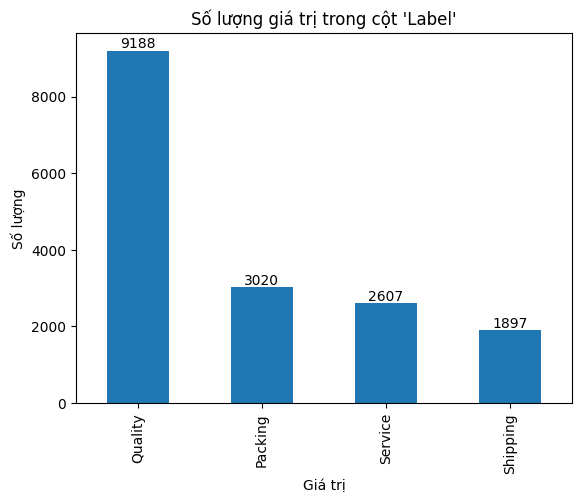

In [14]:
count_data = df_filtered['Label'].value_counts()

import matplotlib.pyplot as plt

# Vẽ biểu đồ dạng thanh
count_data.plot(kind='bar')

# Chỉnh tiêu đề và nhãn cho biểu đồ
plt.title("Số lượng giá trị trong cột 'Label'")
plt.xlabel("Giá trị")
plt.ylabel("Số lượng")

# Hiển thị số liệu chính xác trên từng cột
for i, v in enumerate(count_data):
    plt.annotate(str(v), xy=(i, v+0.1), ha='center', va='bottom', fontsize=10)

# Hiển thị biểu đồ
plt.show()

            Service       Packing
count  16712.000000  16712.000000
mean      -0.791467     -0.792245
std        0.466473      0.437779
min       -1.000000     -1.000000
25%       -1.000000     -1.000000
50%       -1.000000     -1.000000
75%       -1.000000     -1.000000
max        1.000000      1.000000


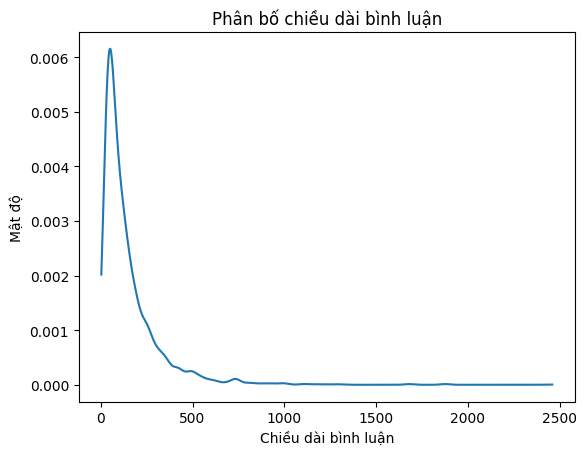

In [15]:
data = df_filtered

# Phân tích mô tả
print(data.describe())

# Phân tích trực quan hóa

# Chiều dài bình luận
# Tính toán mật độ phân bố
density = gaussian_kde(data['content'].str.len())
x = np.linspace(data['content'].str.len().min(), data['content'].str.len().max(), 1000)
y = density(x)

# Vẽ đường cong
plt.plot(x, y)
plt.title("Phân bố chiều dài bình luận")
plt.xlabel("Chiều dài bình luận")
plt.ylabel("Mật độ")
plt.show()

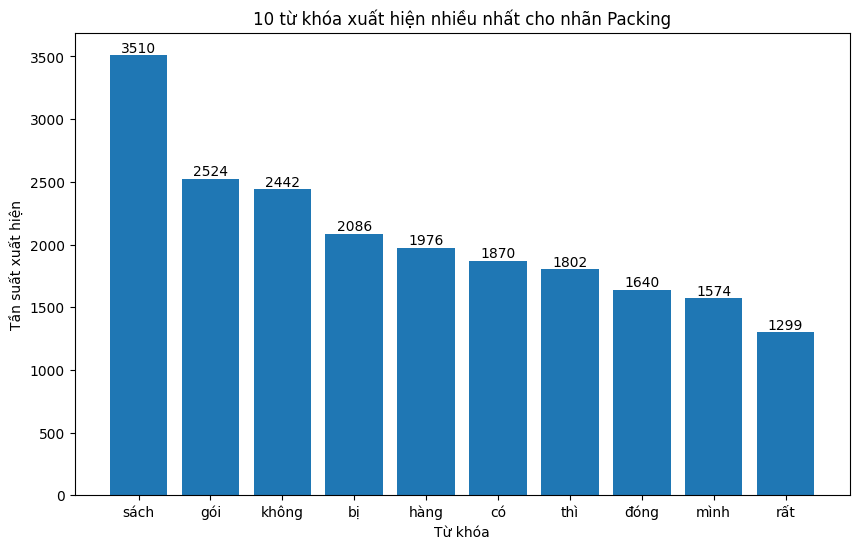

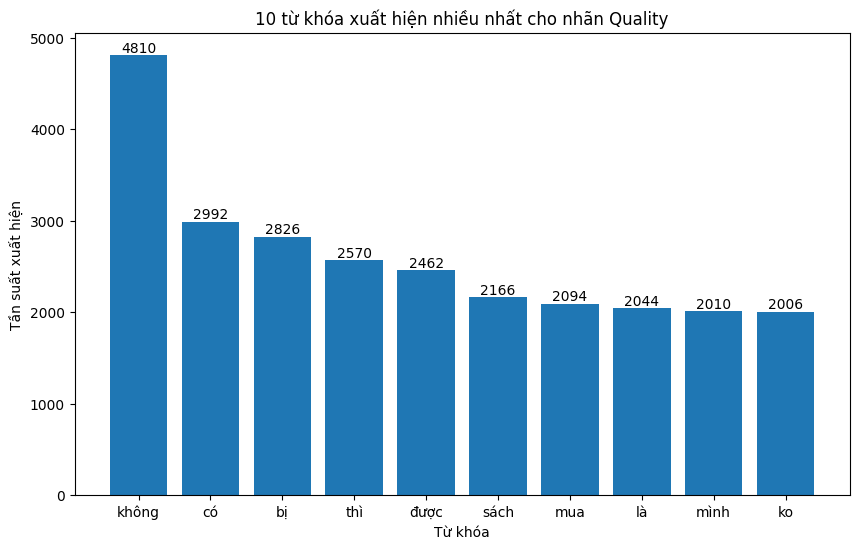

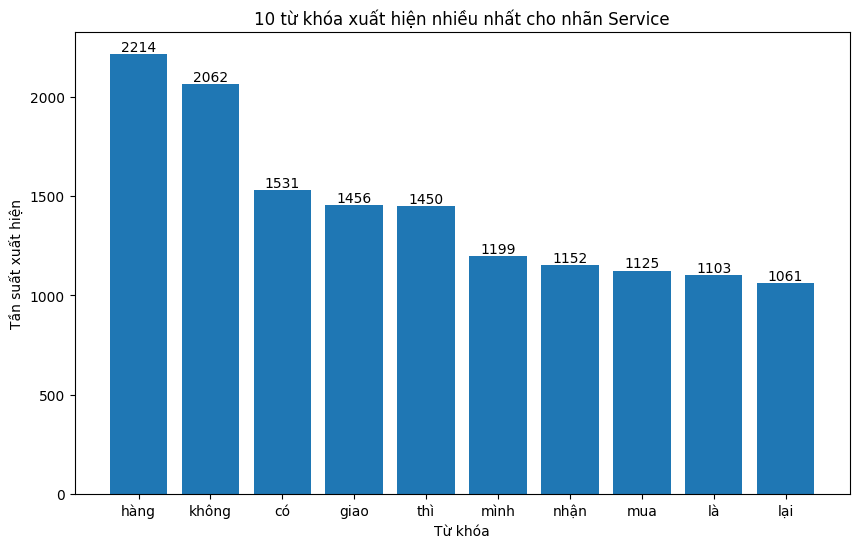

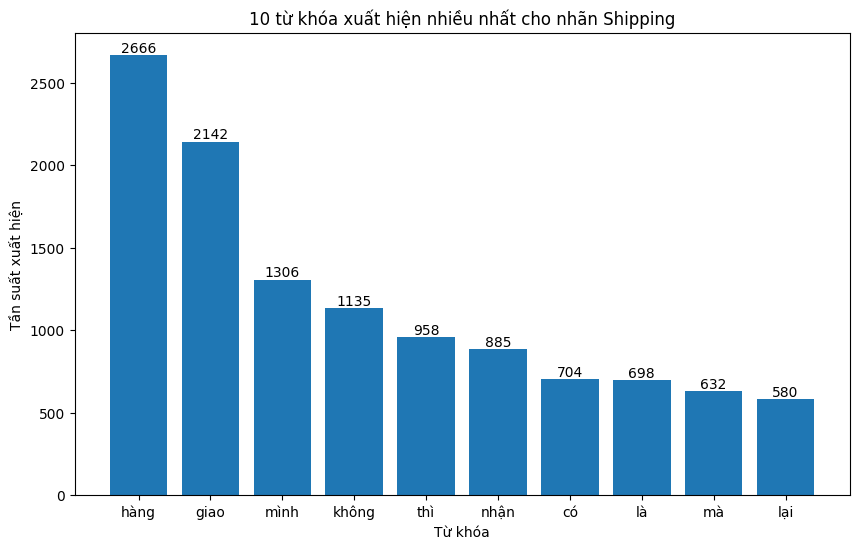

In [16]:
data = df_filtered

# Tạo ma trận TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['content'])

# Nhóm dữ liệu theo nhãn
grouped_data = data.groupby('Label')

# Vẽ biểu đồ cho mỗi nhóm
for label, group_data in grouped_data:
    # Tạo bộ nhớ để lưu trữ số lượng từ khóa
    word_counts = {}

    # Lặp qua từng tài liệu trong nhóm
    for content in group_data['content']:
        # Tách văn bản thành các từ
        words = content.split()

        # Đếm số lượng xuất hiện của mỗi từ
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

    # Sắp xếp từ khóa theo số lượng xuất hiện và lấy 10 từ khóa xuất hiện nhiều nhất
    top_10_keywords = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

    # Vẽ biểu đồ dạng thanh cho 10 từ khóa xuất hiện nhiều nhất
    plt.figure(figsize=(10, 6))
    # Vẽ biểu đồ dạng thanh
    bars = plt.bar(list(zip(*top_10_keywords))[0], list(zip(*top_10_keywords))[1])

    # Chú thích số lượng trên mỗi cột
    for bar, yval in zip(bars, list(zip(*top_10_keywords))[1]):
        plt.annotate(str(yval), xy=(bar.get_x() + bar.get_width() / 2, yval), ha='center', va='bottom')
    plt.title(f"10 từ khóa xuất hiện nhiều nhất cho nhãn {label}")
    plt.xlabel("Từ khóa")
    plt.ylabel("Tần suất xuất hiện")
    plt.show()


# Preprocesing

## Text preprocesing

Function to remove stopwords, preprocessing the Vietnamese

In [17]:
with open('/kaggle/input/vietnamese-stopwords/stopwords.txt', 'r' , encoding='utf-8') as f:
    stopwords = f.read().splitlines()
    stopwords = [i for i in stopwords if i.find(" ")==-1]
bang_nguyen_am= [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]

bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']
nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

# Chuẩn hóa unicode

def chuan_hoa_unicode(text):
	text = unicodedata.normalize('NFC', text)
	return text

# Có 2 kiểu gõ dấu ở Tiếng Việt, ví dụ như là : òa hoặc oà (ta gọi lần lượt là chuẩn 1 và 2). Mặc dù kiểu gõ chữ sau ít
#phổ biến hơn tuy nhiên vẫn cần phải chuẩn hóa tránh việc một số văn bản vẫn sử dụng kiểu gõ dấu thứ 2.
"""
	Hàm này xử lý chuẩn hóa từng từ một, sau khi chuẩn hóa từng từ thì ta sẽ đi chuân hóa từng câu sau
	"""
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)

def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True

def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        # print(cw)
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)

# Project sử dung thu viện pyvi (xem mã nguồn tại : https://github.com/trungtv/pyvi) để phục vụ bài toán con tách từ Tiếng Việt

# Đưa về chữ viết thường
def get_lower(text):
        return text.lower().strip()

# Xóa đi các dấu cách thừa, các từ không cần thiết cho việc phân loại vẳn bản
def chuan_hoa_cau(text):
	text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
	text = re.sub(r'\s+', ' ', text).strip()
	return text

def remove_tag (text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

def remove_url(text):
    pattern = re.compile(r'http\S+')
    return pattern.sub(r'',text)

def remove_punc(text):
    exclude = string.punctuation
    for char in exclude:
        text = text.replace(char,'')
    return text

def remove_stopW(text):
    new_text=[]
    for word in text.split():
        if word in stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = [i for i in new_text if i != '']
    new_text.clear()
    return " ".join(x)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                        u"\U0001F600-\U0001F64F"
                        u"\U0001F300-\U0001F5FF"
                        u"\U0001F680-\U0001F6FF"
                        u"\U0001F1E0-\U0001F1FF"
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# xử lý các từ viết tắt k, ko: không, sp: sản phẩm, sd: sử dụng
replace_list ={
'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ': ' ok ',' okay':' ok ','okê':' ok ',
' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng ',
'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ',
' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',

}
def xu_ly_tu_viet_tat(text):
    for key, value in replace_list.items():
        text = re.sub(r'(?i)\b{}\b'.format(key), value, text)
    return text
def clean_data(text):
    text = get_lower(text)
    text = remove_tag(text)
    text = remove_url(text)
    text = remove_stopW(text)
    text = remove_emoji(text)
    text = remove_punc(text)
    text = chuan_hoa_unicode(text)
    text = chuan_hoa_dau_cau_tieng_viet(text)
    text = chuan_hoa_cau(text)
    text = xu_ly_tu_viet_tat(text)

    return text

In [18]:
df_filtered['content'] = df_filtered['content'].apply(lambda x: clean_data(x))

df_filtered.head(10)

/tmp/ipykernel_33/1545526643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['content'] = df_filtered['content'].apply(lambda x: clean_data(x))


,content,Quality,Service,Shipping,Packing,Label
0,chán lắm mau pin,0,-1.0,-1,-1.0,Quality
1,hàng màu trắng cửa hàng giao màu đen,-1,0.0,-1,-1.0,Service
5,hiệu quả chuột,0,-1.0,-1,-1.0,Quality
8,cắm điện đèn sạc usb mô tả,0,-1.0,-1,-1.0,Quality
9,tệ giao nhầm hàng yc giao nhất,-1,0.0,-1,-1.0,Service
10,ổ lỗi cắm phích lõng lẽo không chặt 1 sao,0,-1.0,-1,-1.0,Quality
13,giao găng thực phẩm cục khuyếch đại wifi mercusy,-1,0.0,-1,-1.0,Service
14,miếng dán hình giới thiệu,0,-1.0,-1,-1.0,Quality
15,sản phẩm kém chất lượng đầu ống đầu vòi không ...,0,-1.0,-1,-1.0,Quality
16,tam tiền,0,-1.0,-1,-1.0,Quality


## Function for training preprocesing


### Define some variables

In [19]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [20]:
def extract_content_and_labels(df):
  """
  Hàm trích xuất nội dung và nhãn từ DataFrame.

  Args:
    df: DataFrame chứa các cột "content" và "Label".

  Returns:
    sentences: Danh sách chứa tất cả nội dung của cột "content".
    labels: Danh sách chứa nhãn tương ứng cho mỗi câu.
  """
  # Kiểm tra xem DataFrame có các cột cần thiết không
  if not ('content' in df.columns and 'Label' in df.columns):
    raise ValueError("DataFrame không chứa các cột 'content' và 'Label'.")

  # Trích xuất nội dung và nhãn thành danh sách
  sentences = df['content'].tolist()
  labels = df['Label'].tolist()

  return sentences, labels

### Training and validation split

In [21]:
def train_val_split(sentences, labels, training_split):
    """
    Splits the dataset into training and validation sets
    
    Args:
        sentences (list of string): lower-cased sentences without stopwords
        labels (list of string): list of labels
        training split (float): proportion of the dataset to convert to include in the train set
    
    Returns:
        train_sentences, validation_sentences, train_labels, validation_labels - lists containing the data splits
    """
    
    
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    
    return train_sentences, validation_sentences, train_labels, validation_labels

### Tokenization - Sequence and padding

In [22]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    """
    Instantiates the Tokenizer class on the training sentences
    
    Args:
        train_sentences (list of string): lower-cased sentences without stopwords to be used for training
        num_words (int) - number of words to keep when tokenizing
        oov_token (string) - symbol for the out-of-vocabulary token
    
    Returns:
        tokenizer (object): an instance of the Tokenizer class containing the word-index dictionary
    """
    
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)
    
    return tokenizer

In [23]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    """
    Generates an array of token sequences and pads them to the same length
    
    Args:
        sentences (list of string): list of sentences to tokenize and pad
        tokenizer (object): Tokenizer instance containing the word-index dictionary
        padding (string): type of padding to use
        maxlen (int): maximum length of the token sequence
    
    Returns:
        padded_sequences (array of int): tokenized sentences padded to the same length
    """ 
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)
    
    return padded_sequences

In [24]:
def tokenize_labels(all_labels, split_labels):
    """
    Tokenizes the labels
    
    Args:
        all_labels (list of string): labels to generate the word-index from
        split_labels (list of string): labels to tokenize
    
    Returns:
        label_seq_np (array of int): tokenized labels
    """
    
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()
    
    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)

    label_to_index = label_tokenizer.word_index
    print(label_to_index)  # This will print the dictionary mapping labels to indices
    
    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    
    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq) - 1
    
    return label_seq_np

## Selecting model for classification

### Machine Learning Model

In [25]:
# Đọc dữ liệu từ file CSV
data = df_filtered

# Tách dữ liệu thành tập huấn luyện và tập thử nghiệm
X = data['content']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo ma trận TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [26]:
# Huấn luyện Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Huấn luyện SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Huấn luyện Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [27]:
# Đánh giá Random Forest
rf_y_pred = rf_classifier.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

print("Kết quả Random Forest:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print("\n-------------------\n")

# Đánh giá SVM
svm_y_pred = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred, average='weighted')
svm_recall = recall_score(y_test, svm_y_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_y_pred, average='weighted')

print("Kết quả SVM:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print("\n-------------------\n")

# Đánh giá Logistic Regression
lr_y_pred = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')

print("Kết quả Logistic Regression:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")

Kết quả Random Forest:
Độ chính xác: 0.9587197128327849
Độ chính xác (weighted): 0.9586634941575959
Độ thu hồi (weighted): 0.9587197128327849
Điểm F1 (weighted): 0.9585864496628523

-------------------

Kết quả SVM:
Độ chính xác: 0.901884534848938
Độ chính xác (weighted): 0.9018189076707184
Độ thu hồi (weighted): 0.901884534848938
Điểm F1 (weighted): 0.9005963660948356

-------------------

Kết quả Logistic Regression:
Độ chính xác: 0.8755608734669459
Độ chính xác (weighted): 0.8769734638837902
Độ thu hồi (weighted): 0.8755608734669459
Điểm F1 (weighted): 0.8725429330133847


In [28]:
# Lưu bộ tham số mô hình Random Forest
with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Lưu bộ tham số mô hình SVM
with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)

# Lưu bộ tham số mô hình Logistic Regression
with open('lr_classifier.pkl', 'wb') as f:
    pickle.dump(lr_classifier, f)

### Deep Learning Model

#### GRU

In [29]:
def create_model_GRU(vocab_size, embedding_dim, maxlen):
    """
    Creates a text classifier model
    
    Args:
        num_words (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
    
    Returns:
        model (tf.keras Model): the text classifier model
    """
    
    tf.random.set_seed(123)
    
    model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen, trainable=False),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

    # Set the training parameters
    
    model_gru.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    return model_gru

#### LSTM

In [30]:
def create_model_LSTM(vocab_size, embedding_dim, maxlen):
    """
    Creates a binary sentiment classifier model
    
    Args:
        vocab_size (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
        embeddings_matrix (array): predefined weights of the embeddings
    
    Returns:
        model (tf.keras Model): the sentiment classifier model
    """
    model = tf.keras.Sequential([ 
        # This is how you need to set the Embedding layer when using pre-trained embeddings
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen, trainable=False),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(64, 5, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=4),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(4, activation='softmax')

    ])
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy']) 

    return model

#### Convolutional

In [31]:
def create_model_conv(vocab_size, embedding_dim, maxlen):
    """
    Creates a binary sentiment classifier model
    
    Args:
        vocab_size (int): size of the vocabulary for the Embedding layer input
        embedding_dim (int): dimensionality of the Embedding layer output
        maxlen (int): length of the input sequences
        embeddings_matrix (array): predefined weights of the embeddings
    
    Returns:
        model (tf.keras Model): the sentiment classifier model
    """
    model = tf.keras.Sequential([ 
        # This is how you need to set the Embedding layer when using pre-trained embeddings
        tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=maxlen, trainable=False),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')

    ])
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy']) 

    return model

## Plot utility

In [32]:
# Plot Utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

## Training

In [33]:
sentences, labels = extract_content_and_labels(df_filtered)

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}")

There are 16712 sentences in the dataset.

First sentence has 4 words (after removing stopwords).

There are 16712 labels in the dataset.

The first 5 labels are ['Quality', 'Service', 'Quality', 'Quality', 'Service']


In [34]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 13369 sentences for training.

There are 13369 labels for training.

There are 3343 sentences for validation.

There are 3343 labels for validation.


In [35]:
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")
print(f"\nindex of word 'i' should be {word_index['i']}")

Vocabulary contains 6473 words

<OOV> token included in vocabulary

index of word 'i' should be 278


In [36]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (13369, 120)

Padded validation sequences have shape: (3343, 120)


In [37]:
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

{'quality': 1, 'packing': 2, 'service': 3, 'shipping': 4}
{'quality': 1, 'packing': 2, 'service': 3, 'shipping': 4}
First 5 labels of the training set should look like this:
[[0]
 [2]
 [0]
 [0]
 [2]]

First 5 labels of the validation set should look like this:
[[0]
 [0]
 [0]
 [0]
 [0]]

Tokenized labels of the training set have shape: (13369, 1)

Tokenized labels of the validation set have shape: (3343, 1)



### LSTM training

In [38]:
model_LSTM = create_model_LSTM(VOCAB_SIZE, EMBEDDING_DIM, MAXLEN)

In [39]:
history_LSTM = model_LSTM.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
418/418 [==============================] - 13s 25ms/step - loss: 1.2396 - accuracy: 0.4634 - val_loss: 0.7099 - val_accuracy: 0.9144
Epoch 2/30
418/418 [==============================] - 10s 23ms/step - loss: 1.1071 - accuracy: 0.5365 - val_loss: 0.3350 - val_accuracy: 0.9545
Epoch 3/30
418/418 [==============================] - 10s 24ms/step - loss: 1.0683 - accuracy: 0.5604 - val_loss: 0.4249 - val_accuracy: 0.9524
Epoch 4/30
418/418 [==============================] - 10s 23ms/step - loss: 1.0156 - accuracy: 0.5840 - val_loss: 0.3507 - val_accuracy: 0.9171
Epoch 5/30
418/418 [==============================] - 10s 24ms/step - loss: 0.9118 - accuracy: 0.6410 - val_loss: 0.3392 - val_accuracy: 0.9381
Epoch 6/30
418/418 [==============================] - 10s 25ms/step - loss: 0.8715 - accuracy: 0.6684 - val_loss: 0.2898 - val_accuracy: 0.9393
Epoch 7/30
418/418 [==============================] - 10s 23ms/step - loss: 0.8353 - accuracy: 0.6813 - val_loss: 0.4551 - val_accuracy:

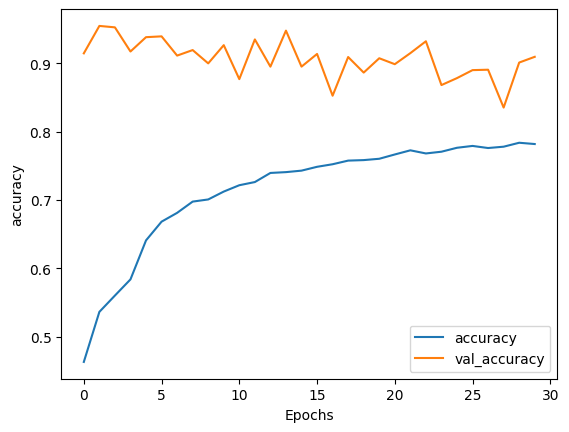

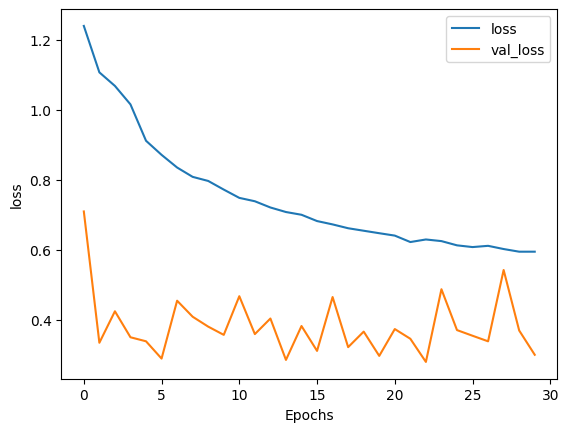

In [40]:
plot_graphs(history_LSTM, "accuracy")
plot_graphs(history_LSTM, "loss")

In [41]:
model_LSTM.save_weights('LSTM.weights.h5')

### GRU training

In [42]:
model_GRU = create_model_GRU(VOCAB_SIZE, EMBEDDING_DIM, MAXLEN)

In [43]:
history_GRU = model_GRU.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
418/418 [==============================] - 28s 56ms/step - loss: 1.2602 - accuracy: 0.4536 - val_loss: 0.7187 - val_accuracy: 0.9022
Epoch 2/30
418/418 [==============================] - 22s 53ms/step - loss: 1.1412 - accuracy: 0.5242 - val_loss: 0.5751 - val_accuracy: 0.9133
Epoch 3/30
418/418 [==============================] - 22s 53ms/step - loss: 1.0819 - accuracy: 0.5520 - val_loss: 0.6580 - val_accuracy: 0.8723
Epoch 4/30
418/418 [==============================] - 22s 53ms/step - loss: 1.0648 - accuracy: 0.5650 - val_loss: 0.4902 - val_accuracy: 0.9240
Epoch 5/30
418/418 [==============================] - 23s 54ms/step - loss: 1.0521 - accuracy: 0.5701 - val_loss: 0.6551 - val_accuracy: 0.8639
Epoch 6/30
418/418 [==============================] - 22s 53ms/step - loss: 1.0373 - accuracy: 0.5822 - val_loss: 0.6223 - val_accuracy: 0.8732
Epoch 7/30
418/418 [==============================] - 23s 54ms/step - loss: 1.0305 - accuracy: 0.5834 - val_loss: 0.4740 - val_accuracy:

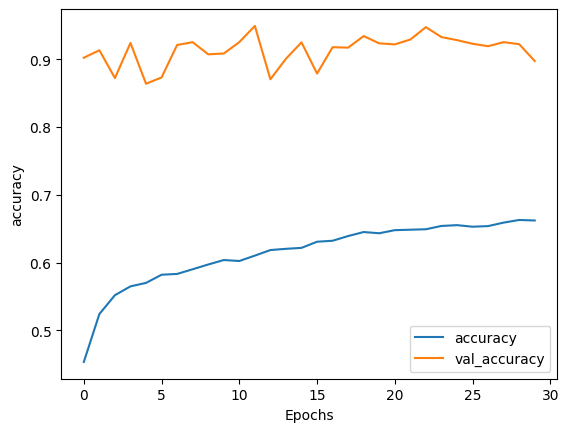

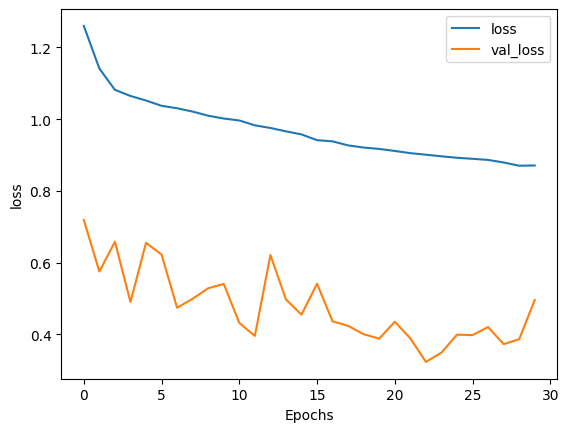

In [44]:
plot_graphs(history_GRU, "accuracy")
plot_graphs(history_GRU, "loss")

In [45]:
model_GRU.save_weights('GRU.weights.h5')

### Convolutional training

In [46]:
model_conv = create_model_conv(VOCAB_SIZE, EMBEDDING_DIM, MAXLEN)

In [47]:
history_conv = model_conv.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
418/418 [==============================] - 6s 10ms/step - loss: 1.2562 - accuracy: 0.4320 - val_loss: 0.7818 - val_accuracy: 0.9755
Epoch 2/30
418/418 [==============================] - 4s 10ms/step - loss: 1.0631 - accuracy: 0.5718 - val_loss: 0.6321 - val_accuracy: 0.9019
Epoch 3/30
418/418 [==============================] - 4s 9ms/step - loss: 0.9807 - accuracy: 0.6139 - val_loss: 0.5936 - val_accuracy: 0.8902
Epoch 4/30
418/418 [==============================] - 4s 9ms/step - loss: 0.9422 - accuracy: 0.6339 - val_loss: 0.4352 - val_accuracy: 0.9390
Epoch 5/30
418/418 [==============================] - 4s 9ms/step - loss: 0.9047 - accuracy: 0.6482 - val_loss: 0.4784 - val_accuracy: 0.9216
Epoch 6/30
418/418 [==============================] - 4s 9ms/step - loss: 0.8766 - accuracy: 0.6615 - val_loss: 0.4425 - val_accuracy: 0.9216
Epoch 7/30
418/418 [==============================] - 4s 9ms/step - loss: 0.8494 - accuracy: 0.6752 - val_loss: 0.3561 - val_accuracy: 0.9471
Epoc

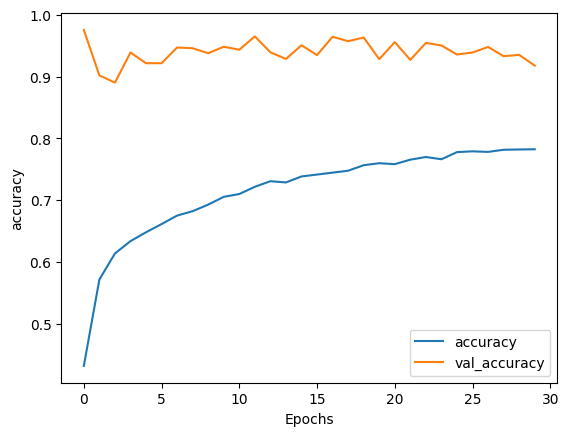

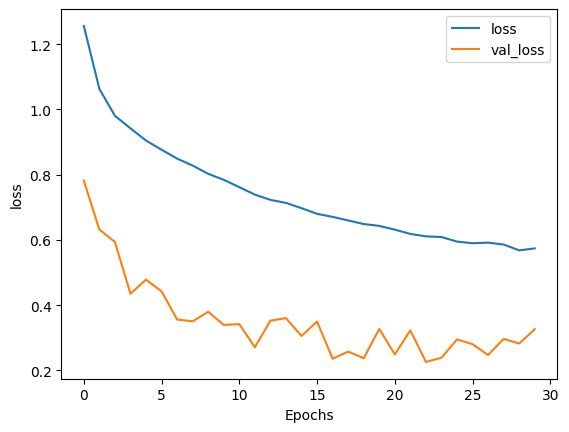

In [48]:
plot_graphs(history_conv, "accuracy")
plot_graphs(history_conv, "loss")

In [49]:
model_conv.save_weights('conv.weights.h5')

In [50]:
label_map = {
    'quality': 0,
    'service': 1,
    'packing': 2,
    'shipping': 3
}

inverse_label_map = {v: k for k, v in label_map.items()}

new_comment = "Sách bị bẩn, gáy sách bị lệch, bìa sách bị bẩn"
print("Comment: ", new_comment)
cleaned_comment = clean_data(new_comment)
print("Cleaned comment: ", cleaned_comment)
new_comment_seq = tokenizer.texts_to_sequences([cleaned_comment])
new_comment_padded = pad_sequences(new_comment_seq, maxlen=MAXLEN, padding='post')

prediction_LSTM = model_LSTM.predict(new_comment_padded)
predicted_label_LSTM = np.argmax(prediction_LSTM, axis=1)[0]
predicted_label_name = inverse_label_map[predicted_label_LSTM]
print("Nhãn dự đoán với mạng LSTM: \n", predicted_label_name)

prediction_GRU = model_GRU.predict(new_comment_padded)
predicted_label_GRU = np.argmax(prediction_GRU, axis=1)[0]
predicted_label_name = inverse_label_map[predicted_label_GRU]
print("Nhãn dự đoán với mạng GRU: \n", predicted_label_name)

prediction_CONV = model_conv.predict(new_comment_padded)
predicted_label_CONV = np.argmax(prediction_CONV, axis=1)[0]
predicted_label_name = inverse_label_map[predicted_label_CONV]
print("Nhãn dự đoán với mạng CONV: \n", predicted_label_name)

Comment:  Sách bị bẩn, gáy sách bị lệch, bìa sách bị bẩn
Cleaned comment:  sách bẩn gáy sách lệch bìa sách bẩn
1/1 [==============================] - 1s 515ms/step
Nhãn dự đoán với mạng LSTM: 
 quality
1/1 [==============================] - 1s 763ms/step
Nhãn dự đoán với mạng GRU: 
 service
1/1 [==============================] - 0s 78ms/step
Nhãn dự đoán với mạng CONV: 
 shipping
